In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from co_helper import *

%matplotlib inline
pd.set_option('precision', 4)

In [6]:
# Append csv file names into a list
file_dir = "csse_covid19_daily_us/"

csv_list = get_filename_list(file_dir+'.')

print(len(csv_list))
csv_list[:5]

100


['04-12-2020.csv',
 '04-13-2020.csv',
 '04-14-2020.csv',
 '04-15-2020.csv',
 '04-16-2020.csv']

In [7]:
col_dropper = ['iso3', 'uid', 'country_region']

def all_data_dict(filelist, column_drop, state_col):
    """Takes in a csv file string name,
    fills in missing date values with 'ffill' and 
    returns dataframes with column names lowercased 
    """ 
    daily_df = pd.concat({filelist[i][:-4]: 
                    pd.read_csv(''.join([file_dir, filelist[i]]))
                                for i in range(len(filelist))})
    daily_df.columns = daily_df.columns.str.lower()
    daily_df = daily_df.rename(columns={state_col:'state'})
    daily_df = daily_df.drop(col_dropper, axis=1)
    daily_df = daily_df.reset_index(level=[0,1], drop=True)

    return daily_df

allts = all_data_dict(csv_list, col_dropper, 'province_state')

In [8]:

print(allts.isnull().sum())
allts.info()
allts.head()

state                      0
last_update               19
lat                      218
long_                    218
confirmed                  0
deaths                     0
recovered               1427
active                    17
fips                      19
incident_rate            218
people_tested            218
people_hospitalized     2095
mortality_rate           118
testing_rate             218
hospitalization_rate    2095
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 5818 non-null   object 
 1   last_update           5799 non-null   object 
 2   lat                   5600 non-null   float64
 3   long_                 5600 non-null   float64
 4   confirmed             5818 non-null   int64  
 5   deaths                5818 non-null   int64  
 6   recovered             4391 non-n

,state,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,testing_rate,hospitalization_rate
0,Alabama,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.9880,21583.0,437.0,2.6102,460.3002,12.2649
1,Alaska,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.5040,8038.0,31.0,2.9412,1344.7116,11.3971
2,Arizona,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.6624,42109.0,NaN,3.2468,578.5223,NaN
3,Arkansas,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.4394,19722.0,130.0,2.1094,761.7534,10.1562
4,California,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.1377,190328.0,5234.0,2.8120,485.4239,22.9612


In [9]:
# State/row index names to drop
idx_dropper = ['Diamond Princess', 'Grand Princess', 'Recovered']
allts = allts.set_index('state').drop(idx_dropper, axis=0)

# Fill in missing dates by forward fill
for s in range(0, len(allts), 56):
    daily_dates = allts.iloc[s:s+56, 0]
    allts.iloc[s:s+56, 0] = daily_dates.fillna(method='ffill')
    
print(len(allts.reset_index('state').state))
allts.head()

5600


,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,people_tested,people_hospitalized,mortality_rate,testing_rate,hospitalization_rate
state,,,,,,,,,,,,,,
Alabama,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.9880,21583.0,437.0,2.6102,460.3002,12.2649
Alaska,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.5040,8038.0,31.0,2.9412,1344.7116,11.3971
Arizona,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.6624,42109.0,NaN,3.2468,578.5223,NaN
Arkansas,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.4394,19722.0,130.0,2.1094,761.7534,10.1562
California,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.1377,190328.0,5234.0,2.8120,485.4239,22.9612


In [6]:
#allts = allts.reset_index('state').sort_values(by=['state', 'last_update'])
#allts.head()

In [10]:
# Regional Categories

midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
northeast = ['Conneticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 
             'New York', 'Pennsylvania', 'Rhode Island', 'Vermont', 'Washington, D.C']
south = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland',
         'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 
         'West Virginia']
west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 
        'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']


# Group into 4 regions; rest are "islands"
geo_list = [midwest, northeast, south, west]
# Print out total number of states within those 4 regions 
print(np.sum([len(geo_list[0]), len(geo_list[1]), len(geo_list[2]), len(geo_list[3])]))


51


In [11]:

allts.isnull().sum()

last_update                0
lat                        0
long_                      0
confirmed                  0
deaths                     0
recovered               1273
active                    17
fips                       1
incident_rate              0
people_tested              0
people_hospitalized     1877
mortality_rate           100
testing_rate               0
hospitalization_rate    1877
dtype: int64

* We want to fill in missing values for `recovered`, `active` and `mortality_rate` columns.
    * for `recovered`, it makes sense that many were blank, since there may not have been enough information regarding recovered patients yet at that time. 
    * `mortality_rate` column can be applied similarly, but it seems that one region may be missing the numbers entirely for its all 100 day data.
    * other columns mentioned can be easily filled in after considering fill methods
* `people_hospitalized` and `hospitalization_rate` can be dropped for now, but can be assessed later if needed.

In [12]:
# Drop 'people_hospitalized' and 'hospitalization_rate' for now

allts = allts.drop(['people_hospitalized', 'hospitalization_rate'], axis=1).reset_index(level='state')

In [10]:
# List of continuous variables


numerical_cols = ['confirmed', 'deaths', 'recovered', 'active', 
                  'people_tested', 'testing_rate', 'mortality_rate', 'incident_rate']
                  #'people_hospitalized',  'hospitalization_rate']
#fillna_cols = ['recovered', 'active', 'mortality_rate']

diffDict = {}
for name, alldf in allts.groupby('state'):
    statedf = allts.loc[allts.state == name, :].copy()
    
    # Convert last_update into datetime type
    last_update = pd.DatetimeIndex(statedf.loc[:, 'last_update'])
    statedf.set_index(last_update, inplace=True)
    
    # Fill all nulls with 0
    statedf.fillna(0.0, inplace=True)
    
    # Create new categorical columns for date/time
    statedf.loc[:, 'month'] = last_update.month.values.astype('int')
    statedf.loc[:, 'day'] = last_update.day.values.astype('int')
    statedf.loc[:, 'region'] = 4
    
    # Match the region values for each state
    for l in range(len(geo_list)):
        if name in geo_list[l]:
            statedf.loc[:, 'region'] = l
    
    # Convert the data into one day diff values
    diff_cols = statedf[numerical_cols].diff()
    
    # Backfill with 3 day avg of first 3 days to fill in missing first diff
    diff_cols.iloc[0] = diff_cols.iloc[1:4].resample('3D').mean().dropna(how='any', axis=0).values#..bfill()
    statedf[numerical_cols] = diff_cols
    
    diffDict[name] = statedf


pd.concat(diffDict).head(10)

state          last_update      lat    long_  \
        last_update                                                           
Alabama 2020-04-12 23:18:15  Alabama  2020-04-12 23:18:15  32.3182 -86.9023   
        2020-04-13 23:07:54  Alabama  2020-04-13 23:07:54  32.3182 -86.9023   
        2020-04-14 23:33:31  Alabama  2020-04-14 23:33:31  32.3182 -86.9023   
        2020-04-15 22:56:51  Alabama  2020-04-15 22:56:51  32.3182 -86.9023   
        2020-04-16 23:30:51  Alabama  2020-04-16 23:30:51  32.3182 -86.9023   
        2020-04-17 23:30:52  Alabama  2020-04-17 23:30:52  32.3182 -86.9023   
        2020-04-18 22:32:47  Alabama  2020-04-18 22:32:47  32.3182 -86.9023   
        2020-04-19 23:41:01  Alabama  2020-04-19 23:41:01  32.3182 -86.9023   
        2020-04-20 23:36:47  Alabama  2020-04-20 23:36:47  32.3182 -86.9023   
        2020-04-21 23:40:34  Alabama  2020-04-21 23:40:34  32.3182 -86.9023   

                             confirmed   deaths  recovered    active  fips  \
        last_update                                                          
Alabama 2020-04-12 23:18:15   170.6667   8.3333        0.0  162.3333   1.0   
        2020-04-13 23:07:54   171.0000   6.0000        0.0  165.0000   1.0   
        2020-04-14 23:33:31   219.0000  15.0000        0.0  204.0000   1.0   
        2020-04-15 22:56:51   122.0000   4.0000        0.0  118.0000   1.0   
        2020-04-16 23:30:51   270.0000  15.0000        0.0  255.0000   1.0   
        2020-04-17 23:30:52   226.0000  15.0000        0.0  211.0000   1.0   
        2020-04-18 22:32:47   141.0000   5.0000        0.0  136.0000   1.0   
        2020-04-19 23:41:01   176.0000   4.0000        0.0  172.0000   1.0   
        2020-04-20 23:36:47   191.0000   6.0000        0.0  185.0000   1.0   
        2020-04-21 23:40:34   238.0000  20.0000        0.0  218.0000   1.0   

                             incident_rate  people_tested  mortality_rate  \
        last_update                                                         
Alabama 2020-04-12 23:18:15         3.6398      4164.6667          0.0952   
        2020-04-13 23:07:54         3.6469      7599.0000          0.0412   
        2020-04-14 23:33:31         4.6706      3935.0000          0.2326   
        2020-04-15 22:56:51         2.6019       960.0000          0.0118   
        2020-04-16 23:30:51         5.7583      2314.0000          0.1653   
        2020-04-17 23:30:52         4.8199      1457.0000          0.1768   
        2020-04-18 22:32:47         3.0071      4690.0000          0.0092   
        2020-04-19 23:41:01         3.7535      3174.0000         -0.0351   
        2020-04-20 23:36:47         4.0735       188.0000         -0.0027   
        2020-04-21 23:40:34         5.0758      2626.0000          0.2325   

                             testing_rate  month  day  region  
        last_update                                            
Alabama 2020-04-12 23:18:15       88.8198      4   12       2  
        2020-04-13 23:07:54      162.0637      4   13       2  
        2020-04-14 23:33:31       83.9217      4   14       2  
        2020-04-15 22:56:51       20.4739      4   15       2  
        2020-04-16 23:30:51       49.3506      4   16       2  
        2020-04-17 23:30:52       31.0734      4   17       2  
        2020-04-18 22:32:47      100.0235      4   18       2  
        2020-04-19 23:41:01       67.6918      4   19       2  
        2020-04-20 23:36:47        4.0095      4   20       2  
        2020-04-21 23:40:34       56.0046      4   21       2

In [11]:
pd.concat(diffDict, axis=0).isnull().sum()

state             0
last_update       0
lat               0
long_             0
confirmed         0
deaths            0
recovered         0
active            0
fips              0
incident_rate     0
people_tested     0
mortality_rate    0
testing_rate      0
month             0
day               0
region            0
dtype: int64

# Convert category variables into dummy variables
* date/time
* state names (fips)
* lat/long

# Visualize 
* 'confirmed' 2 days for all states

/Users/jmaclvin/anaconda3/envs/dsbase/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='last_update'>

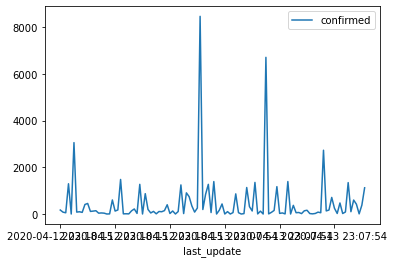

In [12]:
diffdf = pd.concat(diffDict, axis=0).reset_index(level=[0, 'last_update'], drop=True)
diffdf.sort_values(by='last_update').iloc[:56*2].plot(x='last_update', y='confirmed')




   > Before standardizing, 2 day graph of all states' 'confirmed' values with 1-day differencing.

In [13]:
# Make sure some category values are all corresponding to its true value, such as fips
print(diffdf.fips.value_counts())
print(len(diffdf.fips.value_counts()))

# fips = 78 & 0 are off, check the state name
diffdf[(diffdf.fips == 78) | (diffdf.fips == 0.0)]['state']

51.0    100
49.0    100
44.0    100
72.0    100
40.0    100
36.0    100
32.0    100
30.0    100
28.0    100
26.0    100
24.0    100
22.0    100
20.0    100
18.0    100
16.0    100
15.0    100
13.0    100
12.0    100
11.0    100
10.0    100
9.0     100
8.0     100
6.0     100
5.0     100
4.0     100
60.0    100
2.0     100
48.0    100
56.0    100
27.0    100
66.0    100
47.0    100
37.0    100
35.0    100
69.0    100
54.0    100
50.0    100
46.0    100
42.0    100
38.0    100
34.0    100
31.0    100
29.0    100
1.0     100
55.0    100
25.0    100
23.0    100
45.0    100
21.0    100
19.0    100
33.0    100
17.0    100
53.0    100
41.0    100
39.0    100
78.0     99
0.0       1
Name: fips, dtype: int64
57


5000    Virgin Islands
5001    Virgin Islands
5002    Virgin Islands
5003    Virgin Islands
5004    Virgin Islands
             ...      
5095    Virgin Islands
5096    Virgin Islands
5097    Virgin Islands
5098    Virgin Islands
5099    Virgin Islands
Name: state, Length: 100, dtype: object

In [14]:
diffdf.loc[diffdf.state == 'Virgin Islands', 'fips'] = 78.0
print("Re-checking 'fips' count: ",len(diffdf.loc[diffdf.state == 'Virgin Islands']), end='\n\n')
diffdf.isnull().sum()


Re-checking 'fips' count:  100



state             0
last_update       0
lat               0
long_             0
confirmed         0
deaths            0
recovered         0
active            0
fips              0
incident_rate     0
people_tested     0
mortality_rate    0
testing_rate      0
month             0
day               0
region            0
dtype: int64

In [15]:
# Create dummy variables

category_feats = ['fips', 'month', 'day', 'region']

# First set a variable data to orig data with only continuous data
data = diffdf.drop(category_feats, axis=1)

# Get dummy values for the categorical variables, then add it to data

for dummy in category_feats:
    dummies = pd.get_dummies(diffdf[dummy], prefix=dummy, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

data.head(10)

,state,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,...,day_27,day_28,day_29,day_30,day_31,region_0,region_1,region_2,region_3,region_4
0,Alabama,2020-04-12 23:18:15,32.3182,-86.9023,170.6667,8.3333,0.0,162.3333,3.6398,4164.6667,...,0,0,0,0,0,0,0,1,0,0
1,Alabama,2020-04-13 23:07:54,32.3182,-86.9023,171.0000,6.0000,0.0,165.0000,3.6469,7599.0000,...,0,0,0,0,0,0,0,1,0,0
2,Alabama,2020-04-14 23:33:31,32.3182,-86.9023,219.0000,15.0000,0.0,204.0000,4.6706,3935.0000,...,0,0,0,0,0,0,0,1,0,0
3,Alabama,2020-04-15 22:56:51,32.3182,-86.9023,122.0000,4.0000,0.0,118.0000,2.6019,960.0000,...,0,0,0,0,0,0,0,1,0,0
4,Alabama,2020-04-16 23:30:51,32.3182,-86.9023,270.0000,15.0000,0.0,255.0000,5.7583,2314.0000,...,0,0,0,0,0,0,0,1,0,0
5,Alabama,2020-04-17 23:30:52,32.3182,-86.9023,226.0000,15.0000,0.0,211.0000,4.8199,1457.0000,...,0,0,0,0,0,0,0,1,0,0
6,Alabama,2020-04-18 22:32:47,32.3182,-86.9023,141.0000,5.0000,0.0,136.0000,3.0071,4690.0000,...,0,0,0,0,0,0,0,1,0,0
7,Alabama,2020-04-19 23:41:01,32.3182,-86.9023,176.0000,4.0000,0.0,172.0000,3.7535,3174.0000,...,0,0,0,0,0,0,0,1,0,0
8,Alabama,2020-04-20 23:36:47,32.3182,-86.9023,191.0000,6.0000,0.0,185.0000,4.0735,188.0000,...,0,0,0,0,0,0,0,1,0,0
9,Alabama,2020-04-21 23:40:34,32.3182,-86.9023,238.0000,20.0000,0.0,218.0000,5.0758,2626.0000,...,0,0,0,0,0,0,0,1,0,0


In [16]:
data = data.drop(['lat', 'long_'], axis=1)

# Standardize 
* get 0 mean and 1 std

In [48]:
numerical_cols


['confirmed',
 'deaths',
 'recovered',
 'active',
 'people_tested',
 'testing_rate',
 'mortality_rate',
 'incident_rate']

In [49]:
scaled_vars

{'confirmed': [590.4243452380952, 1268.4106129456848],
 'deaths': [21.60589285714286, 78.08755716698498],
 'recovered': [201.37273809523808, 1668.7084297548213],
 'active': [361.66005952380954, 2838.4631153692694],
 'people_tested': [7823.080892857143, 14265.53148893127],
 'testing_rate': [123.99446560387985, 215.33245734684147],
 'mortality_rate': [-0.0003381554037115312, 1.1590174468986698],
 'incident_rate': [8.052004811150455, 13.976206668679628]}

In [17]:
# Store scalings in a dictionary so we can convert back later

    
scaled_vars = {}
for cols in numerical_cols:
    
    mean, std = data[cols].mean(), data[cols].std()
    scaled_vars[cols] = [mean, std]
    data.loc[:, cols] = (data[cols] - mean)/std
    
data.head()


,state,last_update,confirmed,deaths,recovered,active,incident_rate,people_tested,mortality_rate,testing_rate,...,day_27,day_28,day_29,day_30,day_31,region_0,region_1,region_2,region_3,region_4
0,Alabama,2020-04-12 23:18:15,-0.3309,-0.1700,-0.1207,-0.0702,-0.3157,-0.2565,0.0824,-0.1634,...,0,0,0,0,0,0,0,1,0,0
1,Alabama,2020-04-13 23:07:54,-0.3307,-0.1999,-0.1207,-0.0693,-0.3152,-0.0157,0.0358,0.1768,...,0,0,0,0,0,0,0,1,0,0
2,Alabama,2020-04-14 23:33:31,-0.2928,-0.0846,-0.1207,-0.0555,-0.2419,-0.2726,0.2010,-0.1861,...,0,0,0,0,0,0,0,1,0,0
3,Alabama,2020-04-15 22:56:51,-0.3693,-0.2255,-0.1207,-0.0858,-0.3900,-0.4811,0.0105,-0.4807,...,0,0,0,0,0,0,0,1,0,0
4,Alabama,2020-04-16 23:30:51,-0.2526,-0.0846,-0.1207,-0.0376,-0.1641,-0.3862,0.1429,-0.3466,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# Create a new dataframe for target data: each row with 7 columns
ycol = 'confirmed'
#data_ = data.copy()

target_dict = {}
input_dict = {}


for states in data.state.unique():
    x_rows = []
    y_rows = []
    for i in range(len(data[data.state == states])-7):
        x_rows.append(data[data.state==states].iloc[i:i+7, 2:].values.reshape(-1,))
        y_rows.append(data[data.state==states].iloc[i+1:(i+1)+7]['confirmed'].values.reshape(-1))
    input_dict[states] = pd.DataFrame(x_rows)
    target_dict[states] = pd.DataFrame(y_rows)


In [43]:
#pd.concat(input_dict)
print(len(target_dict))
print(len(input_dict))
print(len(target_dict['Alabama']))
print(len(input_dict['Alabama']))

56
56
93
93


# Game Plan: 
* each epoch -> each batch: 7 step/rows sample from each state data -> each input (x, r, dim) -> next random batch.
* 2 Convo layer: (n_features x n_row x filters/steps) ==> (120, 7, 7)
    1) read categorical/binary data and detect locality (time/regional/spatial characteristics)
        - extracts 1/True's
        
    2) read continuous data 
        - NEG/POS?
        
* fully connected layers
* relu activation function between convo layers to differentiate between positives and negatives
* Log softmax as last hidden layer output activation
* Linear activation function at output


In [273]:
input_df = pd.concat(input_dict, axis=0)
target_df = pd.concat(target_dict, axis=0)

In [228]:
len(input_df.columns)
len(input_df)

5208

In [216]:
input_df

0       1       2       3       4       5       6       7    \
Alabama 0  -0.3309 -0.1700 -0.1207 -0.0702 -0.3157 -0.2565  0.0824 -0.1634   
        1  -0.3307 -0.1999 -0.1207 -0.0693 -0.3152 -0.0157  0.0358  0.1768   
        2  -0.2928 -0.0846 -0.1207 -0.0555 -0.2419 -0.2726  0.2010 -0.1861   
        3  -0.3693 -0.2255 -0.1207 -0.0858 -0.3900 -0.4811  0.0105 -0.4807   
        4  -0.2526 -0.0846 -0.1207 -0.0376 -0.1641 -0.3862  0.1429 -0.3466   
...            ...     ...     ...     ...     ...     ...     ...     ...   
Wyoming 88 -0.4426 -0.2767 -0.1075 -0.1249 -0.2176 -0.4624 -0.0168  0.4087   
        89 -0.4489 -0.2767 -0.1123 -0.1249 -0.3165 -0.4908 -0.0117  0.0837   
        90 -0.4269 -0.2767 -0.1003 -0.1221  0.0296 -0.5450 -0.0267 -0.5365   
        91 -0.4474 -0.2767 -0.1141 -0.1232 -0.2918 -0.5468 -0.0119 -0.5574   
        92 -0.4332 -0.2767 -0.1207 -0.1130 -0.0693 -0.5484 -0.0207 -0.5758   

            8    9    ...  718  719  720  721  722  723  724  725  726  727  
Alabama 0   1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
        1   1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
        2   1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
        3   1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
        4   1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
Wyoming 88  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
        89  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
        90  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
        91  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
        92  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5208 rows x 728 columns]

In [47]:
target_df

0       1       2       3       4       5       6
Alabama 0  -0.3307 -0.2928 -0.3693 -0.2526 -0.2873 -0.3543 -0.3267
        1  -0.2928 -0.3693 -0.2526 -0.2873 -0.3543 -0.3267 -0.3149
        2  -0.3693 -0.2526 -0.2873 -0.3543 -0.3267 -0.3149 -0.2778
        3  -0.2526 -0.2873 -0.3543 -0.3267 -0.3149 -0.2778 -0.2479
        4  -0.2873 -0.3543 -0.3267 -0.3149 -0.2778 -0.2479 -0.2771
...            ...     ...     ...     ...     ...     ...     ...
Wyoming 88 -0.4489 -0.4269 -0.4474 -0.4332 -0.4284 -0.4379 -0.4332
        89 -0.4269 -0.4474 -0.4332 -0.4284 -0.4379 -0.4332 -0.4316
        90 -0.4474 -0.4332 -0.4284 -0.4379 -0.4332 -0.4316 -0.4347
        91 -0.4332 -0.4284 -0.4379 -0.4332 -0.4316 -0.4347 -0.4513
        92 -0.4284 -0.4379 -0.4332 -0.4316 -0.4347 -0.4513 -0.4174

[5208 rows x 7 columns]

# Split into Train, Validation, and Test Datasets
* Hold off last 15% of data (Beginning of July: test set)
* Save 15% of training data as validation set 

In [303]:
features, targets = input_df.values, target_df.values


(728,)

In [312]:
# Separate the data into features and targets
split = int(len(features)*0.8)

X, split_X = features[:split], features[split:]
y, split_y = targets[:split], targets[split:]

testsplit = int(len(split_X)*0.5)

val_X, test_X = split_X[:testsplit], split_X[testsplit:]
val_y, test_y = split_y[:testsplit], split_y[testsplit:]

In [313]:
print('train features, targets shape', X.shape, y.shape)
print('test features, targets shape', test_X.shape, test_y.shape)
print('validation features, targets shape', val_X.shape, val_y.shape)

train features, targets shape (4166, 728) (4166, 7)
test features, targets shape (521, 728) (521, 7)
validation features, targets shape (521, 728) (521, 7)


In [311]:
int(len(split_X)*0.5)
split_X.shape

(4166, 728)

In [315]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn

# Convert to tensors and then load as a dataset
trainset = TensorDataset(torch.from_numpy(X), torch.from_numpy(y))
valset = TensorDataset(torch.from_numpy(val_X), torch.from_numpy(val_y))
testset = TensorDataset(torch.from_numpy(test_X), torch.from_numpy(test_y))

trainload = DataLoader(trainset, shuffle=True, batch_size=32)
validload = DataLoader(valset, shuffle=True, batch_size=32)
testload = DataLoader(testset, shuffle=True, batch_size=32)

# Print out one sample and the shapes
dataiter = iter(trainload)
sampleX, sampleY = dataiter.next()

print('Sample input size: ', sampleX.size()) # batch_size, seq_length
print('Sample input: \n', sampleX)

print('\nSample label size: ', sampleY.size()) # batch_size
print('Sample label: \n', sampleY)

Sample input size:  torch.Size([32, 728])
Sample input: 
 tensor([[-0.4000, -0.2383, -0.0566,  ...,  0.0000,  1.0000,  0.0000],
        [-0.4655, -0.2767, -0.1207,  ...,  0.0000,  0.0000,  1.0000],
        [-0.5017, -0.2895, -0.1207,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [-0.0555, -0.2127,  0.1580,  ...,  1.0000,  0.0000,  0.0000],
        [-0.1028, -0.2511, -0.0931,  ...,  0.0000,  1.0000,  0.0000],
        [ 1.6174,  0.0435, -0.1207,  ...,  1.0000,  0.0000,  0.0000]],
       dtype=torch.float64)

Sample label size:  torch.Size([32, 7])
Sample label: 
 tensor([[-3.8349e-01, -3.6930e-01, -3.7718e-01, -3.6378e-01, -3.6220e-01,
         -4.1424e-01, -3.7797e-01],
        [-4.6548e-01, -2.8967e-01, -4.4972e-01, -3.8191e-01, -3.7561e-01,
         -3.5274e-01, -4.6548e-01],
        [-3.3619e-01, -5.7586e-01, -4.4104e-01, -4.1503e-01, -4.5129e-01,
         -4.5681e-01, -4.3947e-01],
        [ 5.5706e-01,  9.1735e-01,  1.3186e+00,  1.2855e+00,  1.0876e+00,
          8.7872e-0

In [233]:
"""# Transform to tensor and normalize with mean & std, converting to 3 dim
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.0,), (1.0,))])
"""

In [252]:
# Next, GPU check

gpu = torch.cuda.is_available()

if not gpu:
    print('CUDA is not available. Training on CPU ... ')
    
else:
    print('CUDA is available! Training on GPU ... ')

CUDA is not available. Training on CPU ... 


In [266]:
# Build a neural network with Pytorch
n_inputs = 
n_output = 7

class CoNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Weights of hiddens
        self.fc1 = nn.Linear(728, n_hidden[0]) # input feature shape: (1, 7, 104) => (1, 7*104) 
        self.fc2 = nn.Linear(n_hidden[0], n_hidden[1])
        # Weights to output
        self.fc3 = nn.Linear(n_hidden[1], n_output)
        
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = x.view(1, 728)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.LogSoftmax(self.fc3(x), dim=1) # output shape: (7, 1)
        
        return x

model = CoNetwork()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

CoNetwork(
  (fc1): Linear(in_features=728, out_features=104, bias=True)
  (fc2): Linear(in_features=104, out_features=77, bias=True)
  (fc3): Linear(in_features=77, out_features=7, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [267]:
# Loss function and optimizer

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training with Validation

In [268]:
epochs = 1

val_loss_min = np.Inf
for epoch in range(epochs):

    for i in range(0, len(features[0]), 256):
        inputs, outputs = features[0][i:i+256], targets[0][i:i+256]
        
        if len(train_features) - i <= 256:
            inputs, outputs = features[0][i:], targets[0][i:]

        trainIter = zip(inputs[:int(len(inputs)*.85)],outputs[:int(len(outputs)*.85)])
        valIter = zip(inputs[int(len(inputs)*.85):], outputs[int(len(outputs)*.85):])

        train_loss = 0.0
        val_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        for X, y in trainIter:
            # move tensors to GPU if CUDA is available
            if gpu:
                X, y = X.cuda(), y.cuda()
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Forward pass
            output = model(X)
            # Get batch loss
            loss = criterion(output, y)
            # Backward pass
            loss.backward()
            # Single optimization step (parameter update)
            optimizer.step()
            # Update training loss
            train_loss += loss.item()

        ######################    
        # validate the model #
        ######################
        model.eval()
        for val_X, val_y in valIter:
            # move tensors to GPU if CUDA is available
            if gpu:
                val_X, val_y = val_X.cuda(), val_y.cuda()
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Forward pass
            output = model(val_X)
            # Get batch loss
            loss = criterion(output, val_y)
            # Backward pass
            loss.backward()
            # Single optimization step (parameter update)
            optimizer.step()
            # Update training loss
            val_loss += loss.item()

        # Calculate average losses
        train_loss = train_loss/len(inputs[:int(len(inputs)*.85)])
        val_loss = val_loss/len(inputs[int(len(inputs)*.85):])

    # Print training/validation statistics
    print('Epoch: {} \tTraining loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, train_loss, valid_loss))

    # Save model if valideation loss has decreased
    if val_loss <= val_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        val_loss_min,
        val_loss))
        torch.save(model.state_dict(), 'model_co19.pt')
        val_loss_min = val_loss

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #2 'mat1' in call to _th_addmm

###### Old workload below; ignore

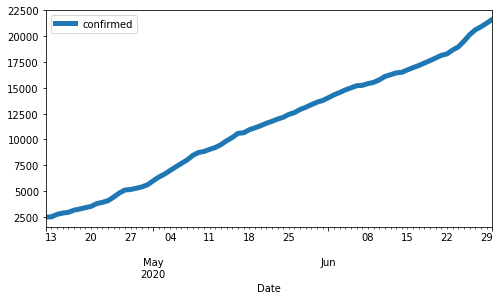

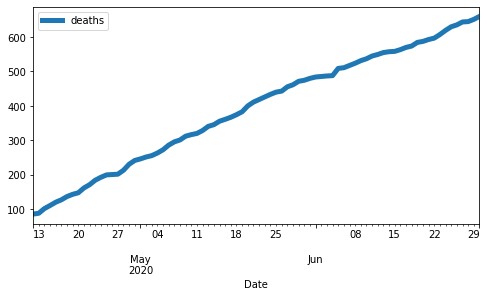

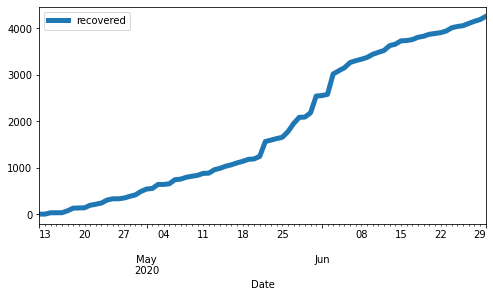

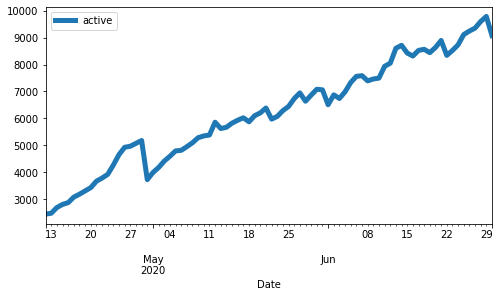

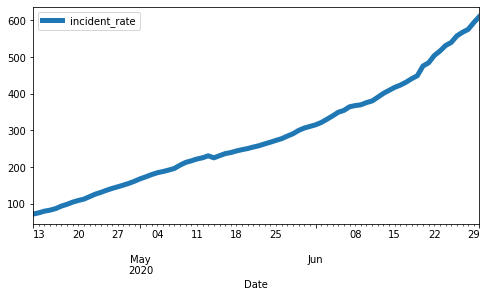

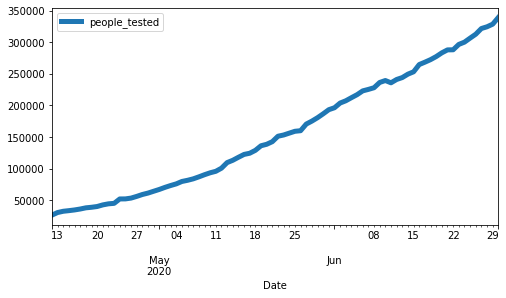

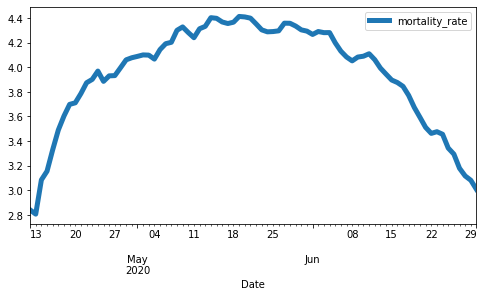

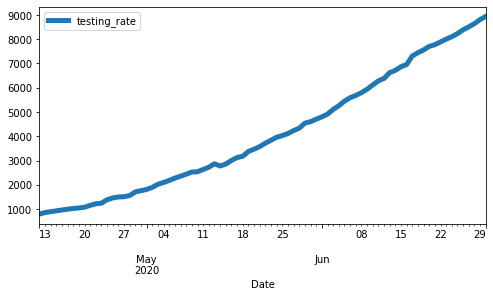

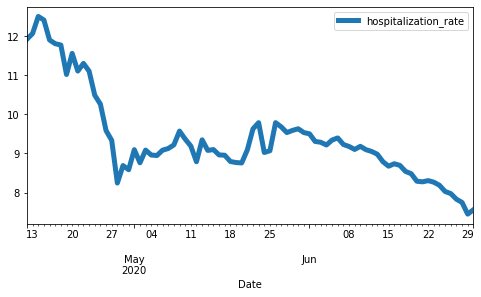

In [11]:
# Aggregate median by date since there are lot of outliers
train_agg_med = train.iloc[:, 1:].groupby(level='date').agg(np.median)

for col in train_agg_med:
    train_agg_med[[col]].plot(figsize=(8,4), linewidth=5, fontsize=10)
    plt.xlabel('Date', fontsize=10);

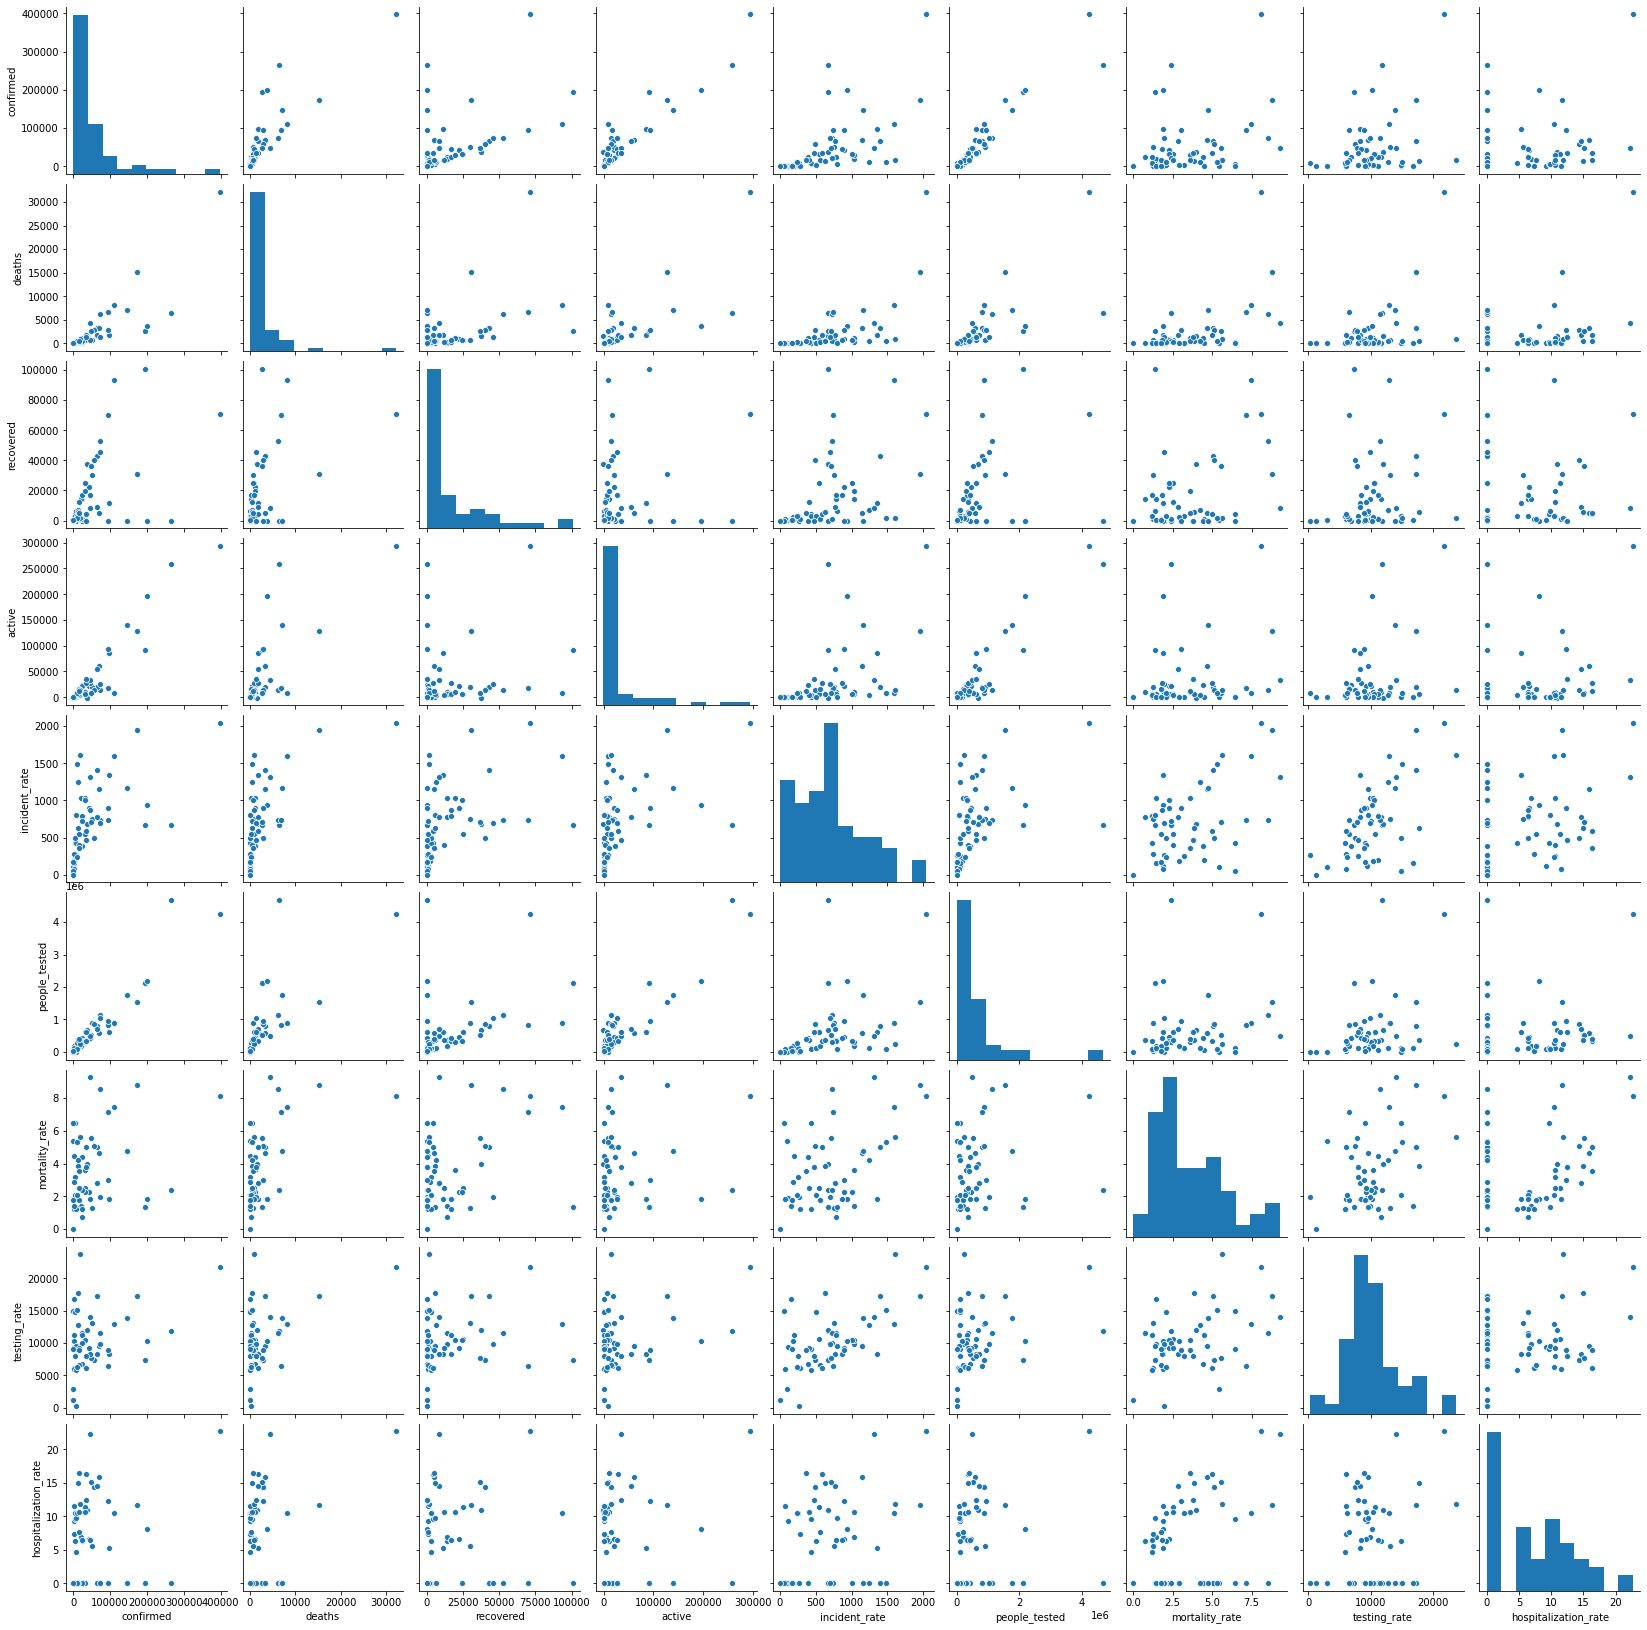

In [12]:
sns.pairplot(test[test.index=='2020-07-05'])

**Not stationary:**
<br><br>
* Active
* Mortality Rate
* Hospitalization Rate

*Resolve by differencing*

<br><br>
**Also, seems better to apply binning with KbinDiscretion by 5 bins and quantile strategy and use the inverse transform encoded bins on each day.**

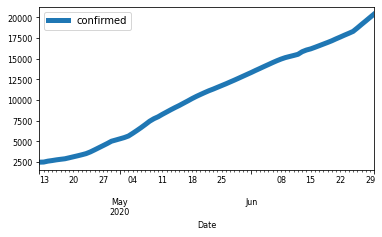

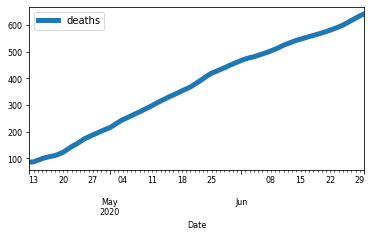

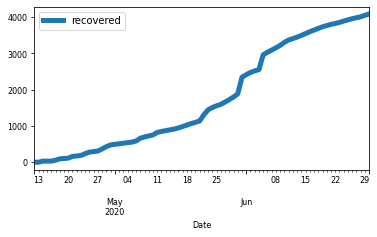

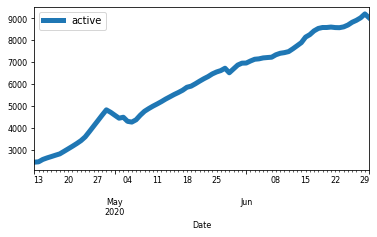

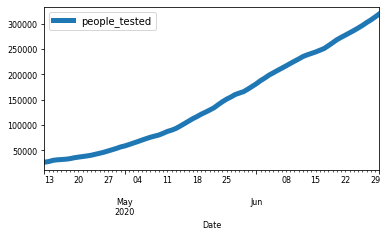

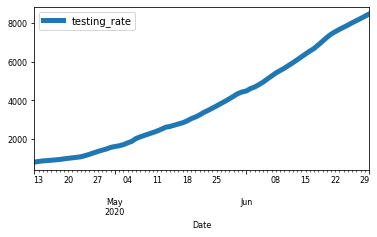

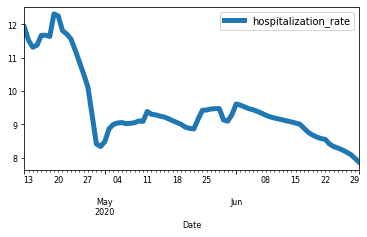

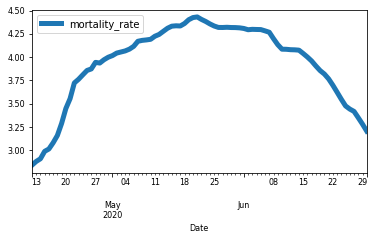

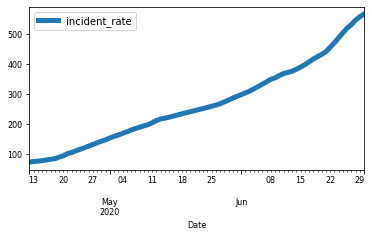

In [15]:
# try wkly rolling mean plot

column_list = ['confirmed', 'deaths', 
                'recovered', 'active', 'people_tested', 'testing_rate', 
                'hospitalization_rate', 'mortality_rate', 'incident_rate']

# by state, do 7 day rolling mean
train_2idx = train
bystate_wkroll = train_2idx.groupby('state')[column_list].rolling(window='7D').mean()
bystate_wkroll
#print(train[train.state=='Alabama'].head(10))
bystate_wkroll.head(10)

# create another agg mean with rolling median data
wkroll_agg = bystate_wkroll.groupby(level='date')[column_list].agg(np.median)

wkroll_agg.shift()
for col in wkroll_agg:
    wkroll_agg[[col]].plot(figsize=(6,3), linewidth=5, fontsize=8)
    plt.xlabel('Date', fontsize=8);

A bit smoother after aggregating the state by state 7 day rolling median. But few are still weird shaped.

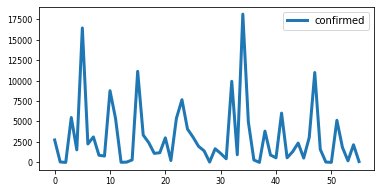

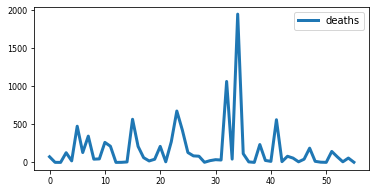

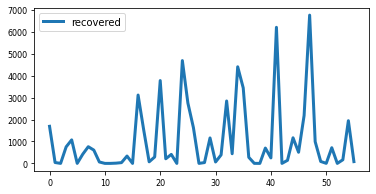

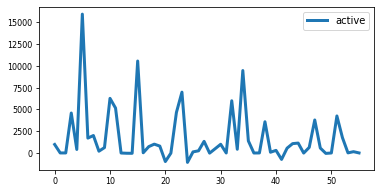

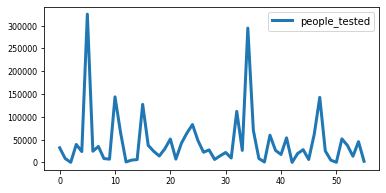

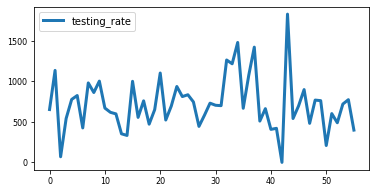

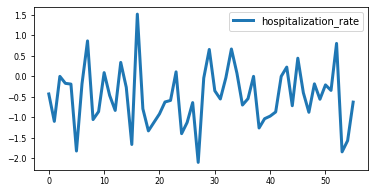

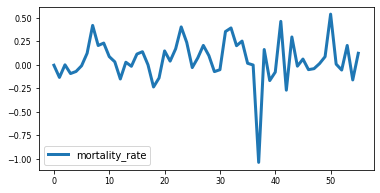

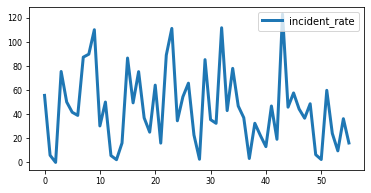

In [20]:
statediff = bystate_wkroll.groupby('state')[column_list].diff(periods=7).dropna()#fillna(method='bfill')
statediff

statediff_agg = statediff.groupby(level='state', as_index=False)[column_list].agg(np.mean)

for cols in statediff_agg:
    statediff_agg[[cols]].plot(figsize=(6, 3), 
                        linewidth=3, 
                        fontsize=8);

In [21]:
# adf stationary test

from statsmodels.tsa.stattools import adfuller


# ADF test function [source: https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/]
def adf_test(ts):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfout = pd.Series(dftest[0:4], 
                      index=['Test Statistic','p-value',
                             '#Lags Used','Number of Observations Used'])
    for key, val in dftest[4].items():
        dfout['Critical Value (%s)'%key] = val
    print (dfout)

In [23]:
# stationary test
for cols in statediff_agg:
    print(f"\n[{cols}] :".upper())
    adf_test(statediff_agg[cols])


[CONFIRMED] :
Results of Dickey-Fuller Test:
Test Statistic                -7.6013e+00
p-value                        2.3852e-11
#Lags Used                     0.0000e+00
Number of Observations Used    5.5000e+01
Critical Value (1%)           -3.5553e+00
Critical Value (5%)           -2.9157e+00
Critical Value (10%)          -2.5957e+00
dtype: float64

[DEATHS] :
Results of Dickey-Fuller Test:
Test Statistic                 -4.0906
p-value                         0.0010
#Lags Used                      1.0000
Number of Observations Used    54.0000
Critical Value (1%)            -3.5577
Critical Value (5%)            -2.9168
Critical Value (10%)           -2.5962
dtype: float64

[RECOVERED] :
Results of Dickey-Fuller Test:
Test Statistic                -6.7444e+00
p-value                        3.0615e-09
#Lags Used                     0.0000e+00
Number of Observations Used    5.5000e+01
Critical Value (1%)           -3.5553e+00
Critical Value (5%)           -2.9157e+00
Critical Value (

Timeseries split, next 7 days forecast 
    X: a state's entire data up to last 7 days
    y: last 7 days of training set

1. bin each day's data set 

In [24]:

bydate.loc[bydate.active < 0, 'active'] = 0.0
train[train[column_list].values < 0].loc[:, 'active'] = 0.0
bydate[bydate[column_list].values < 0][column_list]

,confirmed,deaths,recovered,active,people_tested,testing_rate,hospitalization_rate,mortality_rate,incident_rate
date,,,,,,,,,


There were negative values in 'active'. I figured it makes sense to fill it in as 0, as in "none active", rather than going down to negative values.

In [25]:
from sklearn.preprocessing import KBinsDiscretizer
pd.set_option('precision', 4)

#train_ = train.iloc[:, 1:]
bydate_ = bydate.set_index('state', append=True)

# bin edges and binned inverse transformed for each day
kbin_edges = {}
kbin_daily_dict = {}

for dates, daydf in bydate_.groupby(level='date'):
    daydf_ = daydf.copy()

    if dates not in kbin_daily_dict.keys():
        # use kmeans with 5 bins and onehot encoding since some features width are too small
        kbin = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='kmeans')
        
        kbin_fit = kbin.fit_transform(daydf_)
        
        kbin_edges[str(dates)[:10]] = pd.DataFrame(kbin.bin_edges_, index=column_list)
        
        kbin_daily_dict[str(dates)[:10]] = pd.DataFrame(kbin.inverse_transform(kbin_fit), 
                                                        columns=column_list)
        kbin_daily_dict[str(dates)[:10]].index = daydf.index

# concatenate back into a dataframe
daily_kbin = pd.concat(kbin_daily_dict).reset_index(level=0, drop=True)

daily_kbin.head(10)

confirmed     deaths  recovered      active  \
date       state                                                          
2020-04-12 Alabama          2631.4547   162.6628    82.9836   2541.4561   
           New Mexico       2631.4547   162.6628   360.7127   2541.4561   
           Kansas           2631.4547   162.6628    82.9836   2541.4561   
           California      28902.5464   677.6628    82.9836  27846.9464   
           Virgin Islands   2631.4547   162.6628    82.9836   2541.4561   
           New Jersey      83783.0357  3891.0000    82.9836  80067.0357   
           Kentucky         2631.4547   162.6628   360.7127   2541.4561   
           Arkansas         2631.4547   162.6628   360.7127   2541.4561   
           New Hampshire    2631.4547   162.6628   360.7127   2541.4561   
           Virginia        10471.7154   162.6628    82.9836  10108.3668   

                           people_tested  testing_rate  hospitalization_rate  \
date       state                                                               
2020-04-12 Alabama               50.8159    14200.3755                2.3660   
           New Mexico            50.8159    52540.3314                2.3660   
           Kansas                50.8159    14200.3755                4.1973   
           California            50.8159   235880.5000                2.3660   
           Virgin Islands        50.8159    14200.3755                2.3660   
           New Jersey           710.8760   112186.5809                4.1973   
           Kentucky              50.8159    14200.3755                4.1973   
           Arkansas              50.8159    14200.3755                2.3660   
           New Hampshire         50.8159    14200.3755                2.3660   
           Virginia              50.8159    52540.3314                2.3660   

                           mortality_rate  incident_rate  
date       state                                          
2020-04-12 Alabama               293.9755        14.3668  
           New Mexico           1732.4039         7.5479  
           Kansas                293.9755        21.6454  
           California            293.9755        21.6454  
           Virgin Islands        293.9755         7.5479  
           New Jersey           1732.4039        14.3668  
           Kentucky              762.9159        21.6454  
           Arkansas              762.9159         7.5479  
           New Hampshire         762.9159        14.3668  
           Virginia              293.9755        14.3668

In [26]:
# check bin edges matching up with dataframe rows
kbin_edges['2020-04-12']

,0
confirmed,"[0.0, 5262.90945945946, 15680.521428571428, 42..."
deaths,"[0.0, 325.32558139534876, 1030.0, 1914.5, 5867..."
recovered,"[0.0, 165.96710526315772, 555.4583333333333, 1..."
active,"[0.0, 5082.912162162161, 15133.821428571428, 4..."
people_tested,"[0.0, 101.63185362282053, 236.94561580833334, ..."
testing_rate,"[3.0, 28397.751050420164, 76682.91176470587, 1..."
hospitalization_rate,"[0.0, 1.4604564444785713, 3.271621051702381, 5..."
mortality_rate,"[5.391707554, 582.5592278408571, 943.272515284..."
incident_rate,"[0.0, 4.112122860947369, 10.98369438294737, 17..."


Next step: 
- timeseries split with standardized (if appropriate) state by state data and conduct 7 day forecast
- evaluating model prediction on bin categorization after completing forecasts